In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import random
import cufflinks as cf
from plotly.offline import iplot,plot,init_notebook_mode,download_plotlyjs
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import seaborn as sns

In [2]:
init_notebook_mode(connected=True)

In [3]:
cf.go_offline()
%matplotlib inline

In [4]:
finalcsv = pd.read_csv('FinalMalaria.csv',index_col='DATE(IST)',parse_dates=['DATE(IST)'])

In [5]:
finalcsv.head()

,ALTITUDE(m),AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),Month,rain_days,Malaria_cases,Max_temp,Min_temp,Max_humidity,Min_humidity,Max_pressure,Min_pressure
DATE(IST),,,,,,,,,,,,,,,,
2010-01-31,11,21,1.329630,108.386296,1016.0,47.065367,1.0,1,0,289,31,10,88,14,1023,1010
2010-02-28,11,24,1.112308,224.283462,1013.0,47.516195,1.0,2,0,278,36,12,82,7,1101,1008
2010-03-31,11,29,0.699615,182.606923,1010.0,51.418374,1.0,3,0,351,43,16,83,5,1100,1002
2010-04-30,11,33,1.057895,218.488947,1007.0,60.746518,1.0,4,0,543,43,22,83,6,1012,1000
2010-05-31,11,35,1.326923,242.535769,1003.0,65.298106,1.0,5,0,718,47,22,89,6,1099,996


# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
finalcsv.columns

Index(['ALTITUDE(m)', 'AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'WIND_DIRECTION(deg)',
       'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'RAIN_FALL(mm)', 'Month',
       'rain_days', 'Malaria_cases', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure'],
      dtype='object')

In [9]:
X = finalcsv[['HUMIDITY(%)','rain_days','Month','Min_temp','RAIN_FALL(mm)','Min_humidity']]
y = finalcsv['Malaria_cases']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=10)

In [11]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lrpredict = lr.predict(X_test)

In [13]:
print("Linear Regression's Accuracy is : {0}% ".format(round(r2_score(y_test,lrpredict)*100)))

Linear Regression's Accuracy is : 76.0% 


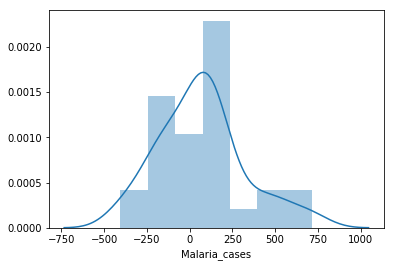

In [14]:
sns.distplot((y_test-lrpredict))

In [15]:
fig = go.Figure()

In [16]:
fig.add_trace(go.Scatter(y=y_test,name='Tested line'))
fig.add_trace(go.Scatter(y=lrpredict,name='Predicted line'))

# KMeans Regression

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler_values = scaler.fit_transform(finalcsv)

C:\Users\Madhav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Madhav\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [20]:
scalerDF = pd.DataFrame(scaler_values,columns=finalcsv.columns)

In [21]:
scalerDF = scalerDF.drop(['ALTITUDE(m)', 'AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'WIND_DIRECTION(deg)',
       'ATMO_PRESSURE(hpa)', 'Malaria_cases', 'Max_humidity', 'Max_pressure', 'Min_pressure','Max_temp'],axis=1)

In [22]:
X = scalerDF
y = finalcsv['Malaria_cases']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
kneighbour = KNeighborsRegressor(n_neighbors=11)

In [26]:
kneighbour.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')

In [27]:
kpredict = kneighbour.predict(X_test) 

In [28]:
print("Linear Regression's Accuracy is : {0}% ".format(round(r2_score(y_test,kpredict)*100)))

Linear Regression's Accuracy is : 73.0% 


In [29]:
# from sklearn.model_selection import GridSearchCV

# temp = {'n_neighbors':list(range(1,30))}

# grid = GridSearchCV(kneighbour,temp,verbose=2)

# grid.fit(X_train,y_train)

# grid.best_estimator_

# grid.best_params_

# kpredict = grid.predict(X_test)

# print("Linear Regression's Accuracy is : {0}% ".format(round(r2_score(y_test,kpredict)*100)))

In [30]:
Xk = finalcsv[['HUMIDITY(%)','Min_pressure','rain_days','Min_humidity','WIND_SPEED(m/s)','Month','Min_temp','Max_temp']]
yk = finalcsv['Malaria_cases']

In [31]:
Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk, yk, test_size=0.13,random_state=10)

In [32]:
accuracy_list = []

In [33]:
for i in range(1,60):
    kneighbour = KNeighborsRegressor(n_neighbors=i,weights='distance',p=1)
    kneighbour.fit(Xk_train,yk_train)
    Ktemp = kneighbour.predict(Xk_test)
    accuracy_list.append([r2_score(yk_test,Ktemp)*100,i])

In [34]:
max(accuracy_list)

[90.34012632566206, 21]

In [35]:
kneighbour = KNeighborsRegressor(n_neighbors=21,weights='distance',p=1,n_jobs=-1)

In [36]:
kneighbour.fit(Xk_train,yk_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=21, p=1,
          weights='distance')

In [37]:
kpredict = kneighbour.predict(Xk_test) 

In [38]:
print("Knearest Neighbour Regression's Accuracy is : {0}% ".format(math.ceil(r2_score(yk_test,kpredict)*100)))

Knearest Neighbour Regression's Accuracy is : 91% 


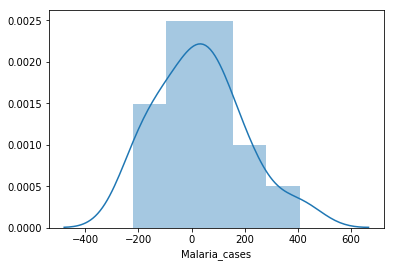

In [39]:
sns.distplot((yk_test-kpredict))

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=yk_test,name='Tested line'))
fig.add_trace(go.Scatter(y=kpredict,name='Predicted line'))

# Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rfc = RandomForestRegressor(n_estimators=1000,criterion='mae',max_depth=4,max_features='sqrt')

In [43]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
rfcpredict = rfc.predict(X_test)

In [45]:
print("Knearest Neighbour Regression's Accuracy is : {0}% ".format(math.ceil(r2_score(y_test,rfcpredict)*100)))

Knearest Neighbour Regression's Accuracy is : 72% 


In [46]:
rfctemp = RandomForestRegressor(n_estimators=1000,criterion='mae',max_depth=6,max_features='sqrt')

In [47]:
Xfull = finalcsv.drop('Malaria_cases',axis=1)
yfull = finalcsv['Malaria_cases']

In [48]:
Xfull_train, Xfull_test, yfull_train, yfull_test = train_test_split(Xfull, yfull, test_size=0.13,random_state=10)

In [49]:
rfctemp.fit(Xfull_train,yfull_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=6,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
fi = pd.DataFrame({'feature': list(['ALTITUDE(m)', 'AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'WIND_DIRECTION(deg)',
       'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'RAIN_FALL(mm)', 'Month',
       'rain_days', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure']),
                   'importance': rfctemp.feature_importances_}).sort_values('importance', ascending = False)

In [51]:
fi

,feature,importance
5,HUMIDITY(%),0.121811
8,rain_days,0.105729
7,Month,0.083041
12,Min_humidity,0.082544
2,WIND_SPEED(m/s),0.076726
14,Min_pressure,0.075724
6,RAIN_FALL(mm),0.071758
9,Max_temp,0.065347
10,Min_temp,0.064339
4,ATMO_PRESSURE(hpa),0.061860


In [52]:
X1 = finalcsv[['HUMIDITY(%)','Min_pressure','rain_days','Min_humidity','WIND_SPEED(m/s)','Month','Min_temp','Max_temp']]
y1 = finalcsv['Malaria_cases']

In [53]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.13,random_state=10)

In [54]:
rfc = RandomForestRegressor(n_estimators=1000,criterion='mae',max_depth=6,max_features='sqrt')

In [55]:
rfc.fit(X1_train,y1_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=6,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
rfcpredict = rfc.predict(X1_test)

In [57]:
print("RandomForest Regression Accuracy is : {0}% ".format(math.ceil(r2_score(y1_test,rfcpredict)*100)))

RandomForest Regression Accuracy is : 90% 


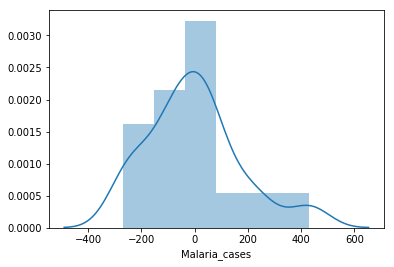

In [58]:
sns.distplot((y1_test-rfcpredict))

In [59]:
fig = go.Figure()
fig.add_traces(go.Scatter(y=y1_test,name='Tested Line'))
fig.add_traces(go.Scatter(y=rfcpredict,name='Predicted Line'))